<a href="https://colab.research.google.com/github/shravan20/mycaptain-ai-certification/blob/main/URL_Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import ipaddress
import re
import socket
import tldextract
from urllib.parse import urlparse
import requests
from bs4 import BeautifulSoup
from googlesearch import search
import whois
from datetime import datetime, timezone
import urllib.request, sys, re
import xmltodict, json
import pandas as pd
import ssl
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("dataset.csv")
df.shape

(11430, 2)

In [11]:
df.head()

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate


In [12]:
def usingIP(self):
    try:
        ipaddress.ip_address(self.domain)
        ip = -1
    except:
        ip = 1
    return ip

df['Having IP Address'] = df['url'].apply(usingIP)

df.head()

,url,status,Having IP Address
0,http://www.crestonwood.com/router.php,legitimate,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1
3,http://rgipt.ac.in,legitimate,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1


In [13]:
def url_length(url):
    return len(url)

df['URL Length'] = df['url'].apply(url_length)

df.head()

,url,status,Having IP Address,URL Length
0,http://www.crestonwood.com/router.php,legitimate,1,37
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126
3,http://rgipt.ac.in,legitimate,1,18
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55


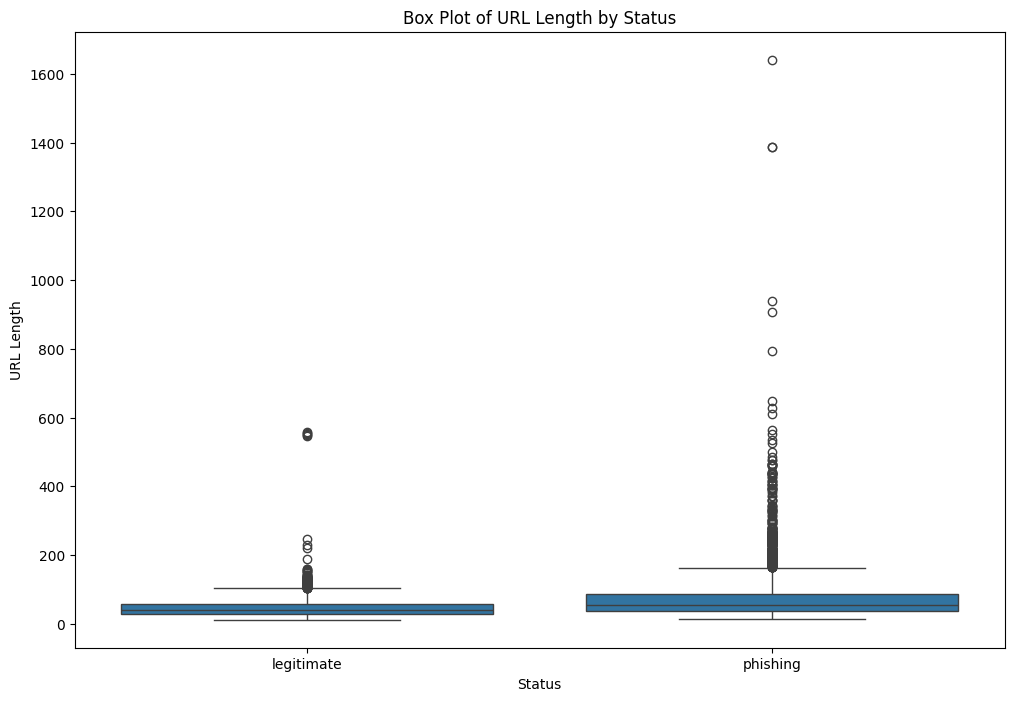

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='status', y='URL Length', data=df)
plt.title('Box Plot of URL Length by Status')
plt.xlabel('Status')
plt.ylabel('URL Length')
plt.show()

In [15]:
df['URL Length'].describe()

count    11430.000000
mean        61.120035
std         55.292470
min         12.000000
25%         33.000000
50%         47.000000
75%         71.000000
max       1641.000000
Name: URL Length, dtype: float64

In [16]:
suspicious_threshold = 50
phishing_threshold = 75
df['URL Category'] = pd.cut(df['URL Length'], bins=[-float('inf'), suspicious_threshold, phishing_threshold, float('inf')],
                            labels=[1, 0, -1], include_lowest=True)

df.head()

,url,status,Having IP Address,URL Length,URL Category
0,http://www.crestonwood.com/router.php,legitimate,1,37,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1
3,http://rgipt.ac.in,legitimate,1,18,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0


In [17]:
def hasShortURL(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net|rb\.gy|on\.com', url)
    if match:
        return -1
    else:
        return 1

df['Has Short URL'] = df['url'].apply(hasShortURL)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1
3,http://rgipt.ac.in,legitimate,1,18,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1


In [18]:
def haveAtSign(url):
    if "@" in url:
        at = -1
    else:
        at = 1
    return at

df['Having At Symbol'] = df['url'].apply(haveAtSign)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1


In [19]:
def redirectSlash(url):
    pos = url.rfind('//')
    if pos > 6:
        if pos > 7:
            return -1
        else:
            return 1
    else:
        return 1

df['Double Slash Redirecting'] = df['url'].apply(redirectSlash)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1


In [20]:
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return -1
    else:
        return 1

df['Prefix Suffix'] = df['url'].apply(prefixSuffix)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1


In [21]:
def numSubDomains(url):
    # Extracting domain from URL
    domain = re.sub(r'^https?://(?:www\.)?', '', url)  # Removing 'http://', 'https://', and 'www.'
    domain = re.sub(r'/.*$', '', domain)  # Removing path if any
    domain = domain.split('.')[-2:]  # Extracting last two parts of the domain

    # Counting subdomains
    num = len(domain) - 1

    # Checking if the top-level domain is in a specific list
    match = re.search('.ac|.ad|.ae|.af|.ag|.ai|.al|.am|.an|.ao|.aq|.ar|.as|.at|.au|.aw|.ax|.az|.ba|.bb|.bd|.be|.bf|.bg|.bh|.bi|.bj|.bm|.bn|.bo|'
                      '.br|.bs|.bt|.bv|.bw|.by|.bz|.ca|.cc|.cd|.cf|.cg|.ch|.ci|.ck|.cl|.cm|.cn|.co|.cr|.cs|.cu|.cv|.cw|.cx|.cy|.cz|.dd|.de|.dj|'
                      '.dk|.dm|.do|.dz|.ec|.ee|.eg|.eh|.er|.es|.et|.eu|.fi|.fj|.fk|.fm|.fo|.fr|.ga|.gb|.gd|.ge|.gf|.gg|.gh|.gi|.gl|.gm|.gn|.gp|'
                      '.gq|.gr|.gs|.gt|.gu|.gw|.gy|.hk|.hm|.hn|.hr|.ht|.hu|.id|.ie|.il|.im|.in|.io|.iq|.ir|.is|.it|.je|.jm|.jo|.jp|.ke|.kg|.kh|'
                      '.ki|.km|.kn|.kp|.kr|.kw|.ky|.kz|.la|.lb|.lc|.li|.lk|.lr|.ls|.lt|.lu|.lv|.ly|.ma|.mc|.md|.me|.mg|.mh|.mk|.ml|.mm|.mn|.mo|'
                      '.mp|.mq|.mr|.ms|.mt|.mu|.mv|.mw|.mx|.my|.mz|.na|.nc|.ne|.nf|.ng|.ni|.nl|.no|.np|.nr|.nu|.nz|.om|.pa|.pe|.pf|.pg|.ph|.pk|'
                      '.pl|.pm|.pn|.pr|.ps|.pt|.pw|.py|.qa|.re|.ro|.rs|.ru|.rw|.sa|.sb|.sc|.sd|.se|.sg|.sh|.si|.sj|.sk|.sl|.sm|.sn|.so|.sr|.ss|'
                      '.st|.su|.sv|.sx|.sy|.sz|.tc|.td|.tf|.tg|.th|.tj|.tk|.tl|.tm|.tn|.to|.tp|.tr|.tt|.tv|.tw|.tz|.ua|.ug|.uk|.us|.uy|.uz|.va|'
                      '.vc|.ve|.vg|.vi|.vn|.vu|.wf|.ws|.ye|.yt|.yu|.za|.zm|.zw', '.'.join(domain))

    if match:
        num -= 1

    # Categorizing based on the number of subdomains
    if num <= 1:
        return 1  # No subdomains or just one subdomain
    elif num == 2:
        return 0  # Two subdomains
    else:
        return -1  # More than two subdomains

df['Having sub domain'] = df['url'].apply(numSubDomains)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1


In [22]:
df = df.head(100)

In [23]:
def validHttps(url):
    if url.startswith('https://'):
        hostname = re.sub(r'^https?://(?:www\.)?', '', url)  # Extracting domain from URL
        context = ssl.create_default_context()
        try:
            with socket.create_connection((hostname, 443)) as sock:
                with context.wrap_socket(sock, server_hostname=hostname) as ssock:
                    cert = ssock.getpeercert()
                    issuer = cert['issuer'][1][0][1]
                    match = re.search(
                        'Certum|VeriSign|Comodo|DigiCert|Entrust|GeoTrust|GlobalSign|GoDaddy|QuoVadis|RapidSSL|USERTrust (Sectigo)|Sectigo|USERTrust|Symantec|Thawte|Network Solutions|SSL.com',
                        issuer)
                    if match:
                        return 1  # Valid HTTPS with a recognized certificate issuer
                    else:
                        return 0  # Valid HTTPS with an unrecognized certificate issuer
        except:
            return -1  # Unable to establish a connection (Invalid HTTPS)

    else:
        return 1  # Not using HTTPS

df['Valid HTTPs'] = df['url'].apply(validHttps)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,Valid HTTPs
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,1


In [24]:
def domRegLen(self):
    try:
        whois_info = whois.whois(self.domain)
        end = whois_info.expiration_date
        start = whois_info.creation_date
        l_date = date(end.year, end.month, end.day)
        f_date = date(start[0].year, start[0].month, start[0].day)
        delta = l_date - f_date
        if delta.days <= 365:
            return -1
        else:
            return 1
    except:
        return -1

df['Domain Registration Length'] = df['url'].apply(domRegLen)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,Valid HTTPs,Domain Registration Length
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,1,-1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,1,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,1,-1


In [25]:
def nonStandPort(url):
    try:
        port = int(urlparse(url).port) if urlparse(url).port else 80  # Default to port 80 if not specified
        if port in [80, 443]:
            return 1  # Standard HTTP or HTTPS ports
        else:
            return -1  # Non-standard port
    except ValueError:
        return 1  # Unable to extract port (e.g., no valid port specified in the URL)

df['Using Non Standard Port'] = df['url'].apply(nonStandPort)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,Valid HTTPs,Domain Registration Length,Using Non Standard Port
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,1,-1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,1,-1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,-1,-1,1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,1,-1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,1,-1,1


In [26]:
def httpsDom(url):
    if url.startswith('https://'):
        return 1  # HTTPS in the domain
    else:
        return -1  # No HTTPS in the domain

df['HTTPs Domain'] = df['url'].apply(httpsDom)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,Valid HTTPs,Domain Registration Length,Using Non Standard Port,HTTPs Domain
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,1,-1,1,-1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,1,-1,1,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,-1,-1,1,1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,1,-1,1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,1,-1,1,-1


In [ ]:
def anchorUrl(url):
    try:
        soup = BeautifulSoup(requests.get(url).content, 'html.parser')
    except:
        return -1  # Or any other value to indicate an error

    a_tags = soup.find_all('a')
    if len(a_tags) == 0:
        return 1  # No anchor tags, consider it good

    invalid = ['#', '#content', '#skip', 'JavaScript::void(0)']
    bad_count = 0

    for t in a_tags:
        try:
            link = t['href']
        except KeyError:
            continue

        if link in invalid or 'javascript:void(0)' in link.lower():
            bad_count += 1

        try:
            requests.get(link)
            url_ref2 = urlparse(link).netloc
            if urlparse(url).netloc not in url_ref2:
                bad_count += 1
        except:
            continue

    bad_ratio = bad_count / len(a_tags)

    if bad_ratio < 0.31:
        return 1  # Good anchor URLs
    elif 0.31 <= bad_ratio <= 0.67:
        return 0  # Suspicious anchor URLs
    else:
        return -1  # Potentially harmful anchor URLs

df['Anchor URL'] = df['url'].apply(anchorUrl)

df.head()

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [ ]:
def linksInScriptTags(url):
    try:
        soup = BeautifulSoup(requests.get(url).content, 'html.parser')
    except:
        return -1  # Or any other value to indicate an error

    mtags = soup.find_all('meta')
    ud = tldextract.extract(url)
    upage = ud.domain
    mcount = 0

    for i in mtags:
        u1 = i.get('href', '')
        currpage = tldextract.extract(u1)
        u1page = currpage.domain
        if u1page != upage:
            mcount += 1

    scount = 0
    stags = soup.find_all('script')

    for j in stags:
        u1 = j.get('src', '')
        currpage = tldextract.extract(u1)
        u1page = currpage.domain
        if u1page != upage:
            scount += 1

    lcount = 0
    ltags = soup.find_all('link')

    for k in ltags:
        u1 = k.get('href', '')
        currpage = tldextract.extract(u1)
        u1page = currpage.domain
        if u1page != upage:
            lcount += 1

    percmtag = (mcount * 100) // len(mtags) if len(mtags) != 0 else 0
    percstag = (scount * 100) // len(stags) if len(stags) != 0 else 0
    percltag = (lcount * 100) // len(ltags) if len(ltags) != 0 else 0

    if percmtag + percstag + percltag < 17:
        return 1
    elif percmtag + percstag + percltag <= 81:
        return 0
    else:
        return -1

df['Links in Script Tags'] = df['url'].apply(linksInScriptTags)

df.head()

In [ ]:
def sfh(url):
    try:
        soup = BeautifulSoup(requests.get(url).content, 'html.parser')
        form_tag = str(soup.form)
        action_index = form_tag.find("action")

        if action_index != -1:
            closing_index = form_tag[action_index:].find(">")
            action_value = form_tag[action_index + 8:closing_index - 1].strip()

            if action_value == "" or action_value.lower() == "about:blank":
                return -1  # SFH detected with an empty or about:blank action attribute

            current_page_domain = tldextract.extract(url).domain
            action_domain = tldextract.extract(action_value).domain

            if current_page_domain in action_domain:
                return 1  # SFH not detected, same domain in action attribute
            else:
                return 0  # SFH detected, different domain in action attribute
        else:
            return 1  # No action attribute found, assuming no SFH

    except requests.exceptions.RequestException as e:
        return -1  # Error in making the request or parsing the HTML

    except Exception as e:
        return -1  # Other exceptions

# Assuming 'requests' and 'beautifulsoup4' are imported and 'df' is your DataFrame
df['SFH'] = df['url'].apply(sfh)

df.head()

In [ ]:
def infoEmail(url):
    try:
        soup = BeautifulSoup(requests.get(url).content, 'html.parser')
        form_tags = soup.find_all('form')

        for form_tag in form_tags:
            form_content = str(form_tag).lower()

            if "mailto:" in form_content:
                return -1  # Mailto: detected in the form

            # If you specifically want to check for mail(), you can uncomment the following lines:
            # if "mail()" in form_content:
            #     return -1  # mail() detected in the form

        return 1  # No mailto: or mail() detected in any form

    except requests.exceptions.RequestException as e:
        return -1  # Error in making the request or parsing the HTML

    except Exception as e:
        return -1  # Other exceptions

# Assuming 'requests' and 'beautifulsoup4' are imported and 'df' is your DataFrame
df['Info Email'] = df['url'].apply(infoEmail)

df.head()

In [ ]:
def abnormalUrl(url):
    try:
        response = requests.get(url)
        if not response.text:
            return -1  # Empty response text
        return 1  # Non-empty response text"

    except requests.exceptions.RequestException as e:
        return -1  # Error in making the request or handling the response

    except Exception as e:
        return -1  # Other exceptions

# Assuming 'requests' is imported and 'df' is your DataFrame
df['Abnormal URL'] = df['url'].apply(abnormalUrl)

df.head()

In [32]:
def webForward(url):
    try:
        response = requests.get(url, allow_redirects=False)
        if not response:
            return -1  # No response received

        if len(response.history) <= 1:
            return 1  # No or minimal web forwarding
        elif 2 <= len(response.history) <= 4:
            return 0  # Moderate web forwarding
        else:
            return -1  # Strong web forwarding

    except requests.exceptions.RequestException as e:
        return -1  # Error in making the request

    except Exception as e:
        return -1  # Other exceptions

# Assuming 'requests' is imported and 'df' is your DataFrame
df['Web Forward'] = df['url'].apply(webForward)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,Valid HTTPs,Domain Registration Length,Using Non Standard Port,HTTPs Domain,Anchor URL,Links in Script Tags,SFH,Info Email,Abnormal URL,Web Forward
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,1,-1,1,-1,1,1,1,1,-1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,1,-1,1,-1,1,1,1,1,1,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,-1,-1,1,1,-1,-1,-1,-1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,1,-1,1,-1,1,-1,0,1,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,1,-1,1,-1,1,-1,1,1,1,1


In [33]:
def statusBarCust(url):
    try:
        soup = BeautifulSoup(requests.get(url).content, 'html.parser')
        if soup.find(lambda tag: 'onmouseover' in tag.attrs and 'window.status' in tag['onmouseover'].lower()):
            return -1  # StatusBar customization detected
        return 1

    except requests.exceptions.RequestException as e:
        return -1  # Error in making the request or parsing the HTML

    except Exception as e:
        return -1  # Other exceptions

# Assuming 'requests' and 'beautifulsoup4' are imported and 'df' is your DataFrame
df['Status Bar Customization'] = df['url'].apply(statusBarCust)

df.head()

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,Domain Registration Length,Using Non Standard Port,HTTPs Domain,Anchor URL,Links in Script Tags,SFH,Info Email,Abnormal URL,Web Forward,Status Bar Customization
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,-1,1,-1,1,1,1,1,-1,1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,-1,1,-1,1,1,1,1,1,-1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,-1,1,-1,1,-1,0,1,1,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,-1,1,-1,1,-1,1,1,1,1,1


In [34]:
def disableRightClick(url):
    try:
        soup = BeautifulSoup(requests.get(url).content, 'html.parser')

        # Check for attributes that might disable right-click
        disable_attrs = ['oncontextmenu', 'ondragstart', 'onselectstart', 'onmousedown', 'onmouseup']
        for tag in soup.find_all():
            for attr in disable_attrs:
                if tag.has_attr(attr):
                    return -1  # Right-click is disabled

        # Check for JavaScript code that might disable right-click
        js_code = soup.find_all('script')
        for script in js_code:
            if 'event.button === 2' in script.text:
                return -1  # Right-click is disabled

        return 1  # Right-click is not disabled

    except requests.exceptions.RequestException as e:
        return -1  # Error in making the request or parsing the HTML

    except Exception as e:
        return -1  # Other exceptions

# Assuming 'requests' and 'beautifulsoup4' are imported and 'df' is your DataFrame
df['Disable Right Click'] = df['url'].apply(disableRightClick)

df.head()

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,Using Non Standard Port,HTTPs Domain,Anchor URL,Links in Script Tags,SFH,Info Email,Abnormal URL,Web Forward,Status Bar Customization,Disable Right Click
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,1,-1,1,1,1,1,-1,1,1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,1,-1,1,1,1,1,1,-1,1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,1,1,-1,-1,-1,-1,-1,-1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,1,-1,1,-1,0,1,1,1,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,1,-1,1,-1,1,1,1,1,1,1


In [35]:
def popupWindow(url):
    try:
        response = requests.get(url)
        if response.text == "":
            return -1  # Empty response, potentially indicating an issue

        if re.search(r"prompt\(", response.text, re.IGNORECASE):
            return -1  # JavaScript prompt detected in the response
        else:
            return 1  # No JavaScript prompt detected

    except requests.exceptions.RequestException as e:
        return -1  # Error in making the request or receiving the response

    except Exception as e:
        return -1  # Other exceptions

# Assuming 'requests' is imported and 'df' is your DataFrame
df['Popup Window'] = df['url'].apply(popupWindow)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,HTTPs Domain,Anchor URL,Links in Script Tags,SFH,Info Email,Abnormal URL,Web Forward,Status Bar Customization,Disable Right Click,Popup Window
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,-1,1,1,1,1,-1,1,1,1,-1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,-1,1,1,1,1,1,-1,1,1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,-1,1,-1,0,1,1,1,1,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,-1,1,-1,1,1,1,1,1,1,1


In [36]:
def iFrameRed(url):
    try:
        soup = BeautifulSoup(requests.get(url).content, 'html.parser')
        iframe_tags = soup.find_all('iframe')

        if len(iframe_tags) > 0:
            return -1  # iFrame detected in the HTML
        else:
            return 1  # No iFrame detected in the HTML

    except requests.exceptions.RequestException as e:
        return 1  # Error in making the request or parsing the HTML

    except Exception as e:
        return 1  # Other exceptions

# Assuming 'requests' and 'beautifulsoup4' are imported and 'df' is your DataFrame
df['iFrame'] = df['url'].apply(iFrameRed)

df.head()

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,Anchor URL,Links in Script Tags,SFH,Info Email,Abnormal URL,Web Forward,Status Bar Customization,Disable Right Click,Popup Window,iFrame
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,1,1,1,1,-1,1,1,1,-1,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,1,1,1,1,1,-1,1,1,1,1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,1,-1,0,1,1,1,1,1,1,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,1,-1,1,1,1,1,1,1,1,1


In [40]:
def domAge(url):
    try:
        # Extract the domain from the URL
        domain = tldextract.extract(url).domain

        # Fetch WHOIS information
        whois_info = whois.whois(domain)

        # Check if 'creation_date' is a list (for some domains, it may return a list)
        if isinstance(whois_info.creation_date, list):
            creation_date = whois_info.creation_date[0]
        else:
            creation_date = whois_info.creation_date

        # Calculate domain age
        if creation_date:
            start_date = date(creation_date.year, creation_date.month, creation_date.day)
            today = datetime.today().date()
            delta = today - start_date

            # Check if the domain age is greater than or equal to 182.5 days
            if delta.days >= 182.5:
                return 1  # Domain age is sufficient
            else:
                return -1  # Domain age is not sufficient
        else:
            return -1  # Unable to retrieve creation date from WHOIS

    # except whois.parser.PywhoisError as e:
    #     return -1  # PywhoisError occurred (e.g., domain not found, WHOIS server error)

    except Exception as e:
        return -1  # Other exceptions

# Assuming 'tldextract' and 'whois' are imported, and 'df' is your DataFrame
df['Domain Age'] = df['url'].apply(domAge)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,Links in Script Tags,SFH,Info Email,Abnormal URL,Web Forward,Status Bar Customization,Disable Right Click,Popup Window,iFrame,Domain Age
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,1,1,1,-1,1,1,1,-1,1,-1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,1,1,1,1,-1,1,1,1,1,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,-1,0,1,1,1,1,1,1,1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,-1,1,1,1,1,1,1,1,1,-1


In [41]:
def dnsRecord(url):
    try:
        domain_info = whois.whois(url)

        # Check if the 'status' attribute is present to determine if WHOIS information is available
        if 'status' in domain_info and domain_info['status']:
            return 1  # DNS Record exists
        else:
            return -1  # No DNS Record found

    # except whois.parser.PywhoisError:
    #     return -1  # Error in parsing WHOIS information

    except Exception as e:
        return -1  # Other exceptions

# Assuming 'whois' library is installed and 'df' is your DataFrame
df['DNS Record'] = df['url'].apply(dnsRecord)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,SFH,Info Email,Abnormal URL,Web Forward,Status Bar Customization,Disable Right Click,Popup Window,iFrame,Domain Age,DNS Record
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,1,1,-1,1,1,1,-1,1,-1,-1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,1,1,1,-1,1,1,1,1,-1,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,-1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,-1,-1


In [42]:
def webTraff(url):
    try:
        domain = urlparse(url).netloc
        xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format(domain)).read()

        result = xmltodict.parse(xml)
        data = json.dumps(result).replace("@", "")
        data_tojson = json.loads(data)

        if "ALEXA" in data_tojson and "SD" in data_tojson["ALEXA"]:
            url_info = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["URL"]
            rank = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["TEXT"]
            rank = int(rank)

            if rank < 100000:
                return 1  # High web traffic
            else:
                return 0  # Low web traffic

        return -1  # Data structure doesn't match expectations

    except Exception as e:
        return -1  # Error during data retrieval or parsing

# Assuming 'urllib.request' and 'xmltodict' are imported and 'df' is your DataFrame
df['Web Traffic'] = df['url'].apply(webTraff)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,Info Email,Abnormal URL,Web Forward,Status Bar Customization,Disable Right Click,Popup Window,iFrame,Domain Age,DNS Record,Web Traffic
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,1,-1,1,1,1,-1,1,-1,-1,-1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,1,1,-1,1,1,1,1,-1,-1,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,1,1,1,1,1,1,1,-1,-1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,1,1,1,1,1,1,1,-1,-1,-1


In [43]:
def pageRank(url):
    try:
        domain = urlparse(url).netloc
        xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format(domain)).read()

        result = xmltodict.parse(xml)
        data = json.dumps(result).replace("@", "")
        data_tojson = json.loads(data)

        if "ALEXA" in data_tojson and "SD" in data_tojson["ALEXA"]:
            rank = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["TEXT"]
            rank = int(rank)

            return rank

        return -1  # Data structure doesn't match expectations

    except Exception as e:
        return -1  # Error during data retrieval or parsing

# Assuming 'urllib.request' and 'xmltodict' are imported and 'df' is your DataFrame
df['Page Rank'] = df['url'].apply(pageRank)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,Abnormal URL,Web Forward,Status Bar Customization,Disable Right Click,Popup Window,iFrame,Domain Age,DNS Record,Web Traffic,Page Rank
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,-1,1,1,1,-1,1,-1,-1,-1,-1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,1,-1,1,1,1,1,-1,-1,-1,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,1,1,1,1,1,1,-1,-1,-1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,1,1,1,1,1,1,-1,-1,-1,-1


In [44]:
def googleIndex(url):
    try:
        query = f"site:{url}"
        results = list(search(query, num=1, stop=1, pause=2))  # Adjust parameters as needed

        if results and url in results[0]:
            return 1  # URL is indexed
        else:
            return -1  # URL is not indexed

    except Exception as e:
        return -1  # Error during Google search or parsing results

# Assuming 'googlesearch-python' is installed and 'df' is your DataFrame
df['Google Index'] = df['url'].apply(googleIndex)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,Web Forward,Status Bar Customization,Disable Right Click,Popup Window,iFrame,Domain Age,DNS Record,Web Traffic,Page Rank,Google Index
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,1,1,1,-1,1,-1,-1,-1,-1,-1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,-1,1,1,1,1,-1,-1,-1,-1,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1


In [45]:
def linksPointingToPage(url):
    try:
        soup = BeautifulSoup(requests.get(url).content, 'html.parser')
        domain_links = soup.find_all(href=lambda value: value and ('http://' + domain) in value or ('https://' + domain) in value)

        number_of_links = len(domain_links)

        if number_of_links == 0:
            return -1  # No links pointing to the page
        elif number_of_links <= 2:
            return 0  # A small number of links pointing to the page
        else:
            return 1  # Many links pointing to the page

    # except requests.exceptions.RequestException as e:
    #     return -1  # Error in making the request or parsing the HTML

    except Exception as e:
        return -1  # Other exceptions

# Assuming 'requests' and 'beautifulsoup4' are imported and 'df' is your DataFrame
df['Links Pointing To Page'] = df['url'].apply(linksPointingToPage)

df.head()

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,Status Bar Customization,Disable Right Click,Popup Window,iFrame,Domain Age,DNS Record,Web Traffic,Page Rank,Google Index,Links Pointing To Page
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,1,1,-1,1,-1,-1,-1,-1,-1,-1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,1,1,1,1,-1,-1,-1,-1,-1,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,1,1,1,1,-1,-1,-1,-1,-1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,1,1,1,1,-1,-1,-1,-1,-1,-1


In [46]:
def statReport(url):
    try:
        domain = urlparse(url).netloc
        ip_address = socket.gethostbyname(domain)

        # Patterns for suspicious URLs
        url_patterns = re.compile(r'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', re.IGNORECASE)

        # Patterns for suspicious IP addresses
        ip_patterns = re.compile(r'146\.112\.61\.108|213\.174\.157\.151|...|110\.34\.231\.42', re.IGNORECASE)

        url_match = url_patterns.search(url)
        ip_match = ip_patterns.search(ip_address)

        if url_match or ip_match:
            return -1  # Suspicious
        else:
            return 1  # Not suspicious

    except Exception as e:
        return -1  # Error during IP address retrieval or parsing

# Assuming 'urlparse' is imported and 'df' is your DataFrame
df['Stat Report'] = df['url'].apply(statReport)

df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,Disable Right Click,Popup Window,iFrame,Domain Age,DNS Record,Web Traffic,Page Rank,Google Index,Links Pointing To Page,Stat Report
0,http://www.crestonwood.com/router.php,legitimate,1,37,1,1,1,1,1,1,...,1,-1,1,-1,-1,-1,-1,-1,-1,-1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,1,77,-1,1,1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1
2,https://support-appleld.com.secureupdate.duila...,phishing,1,126,-1,1,1,1,-1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,http://rgipt.ac.in,legitimate,1,18,1,1,1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,1,55,0,1,1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1


In [49]:
df['status'] = df['status'].replace({'phishing': -1, 'legitimate': 1})
df.head()

,url,status,Having IP Address,URL Length,URL Category,Has Short URL,Having At Symbol,Double Slash Redirecting,Prefix Suffix,Having sub domain,...,Disable Right Click,Popup Window,iFrame,Domain Age,DNS Record,Web Traffic,Page Rank,Google Index,Links Pointing To Page,Stat Report
0,http://www.crestonwood.com/router.php,1,1,37,1,1,1,1,1,1,...,1,-1,1,-1,-1,-1,-1,-1,-1,-1
1,http://shadetreetechnology.com/V4/validation/a...,-1,1,77,-1,1,1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1
2,https://support-appleld.com.secureupdate.duila...,-1,1,126,-1,1,1,1,-1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,http://rgipt.ac.in,1,1,18,1,1,1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1
4,http://www.iracing.com/tracks/gateway-motorspo...,1,1,55,0,1,1,1,1,1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [51]:
X = df.drop(['status', 'url'], axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(" ")
print(f"Confusion Matrix:\n{conf_matrix}")
print(" ")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8
 
Confusion Matrix:
[[7 2]
 [2 9]]
 
Classification Report:
              precision    recall  f1-score   support

          -1       0.78      0.78      0.78         9
           1       0.82      0.82      0.82        11

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



In [53]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf}")
print(" ")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(" ")
print(f"Classification Report:\n{class_report_rf}")

Random Forest Model:
Accuracy: 0.9
 
Confusion Matrix:
[[9 0]
 [2 9]]
 
Classification Report:
              precision    recall  f1-score   support

          -1       0.82      1.00      0.90         9
           1       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20

